In [192]:
import pandas as pd
import datetime
import numpy as np
import tweepy
import json
from tweepy import Cursor
import nltk
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize
import re
import string
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk import SnowballStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.util import ngrams
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from bs4 import BeautifulSoup
import random
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from __future__ import print_function
from wordcloud import WordCloud, STOPWORDS
stop = set(stopwords.words('english'))
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv('./training_manutd.csv', header= None, names= cols, encoding = "ISO-8859-1")
df.to_json('./training_manutd.jsonl')

In [167]:
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})
df.sentiment.value_counts()
# 1 Posative 0 Negative

1    800000
0    800000
Name: sentiment, dtype: int64

In [168]:
df.text = df.text.str.replace(r'\d+', '')
df.text = df['text'].str.replace('[{}]'.format(string.punctuation), '')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop)]))

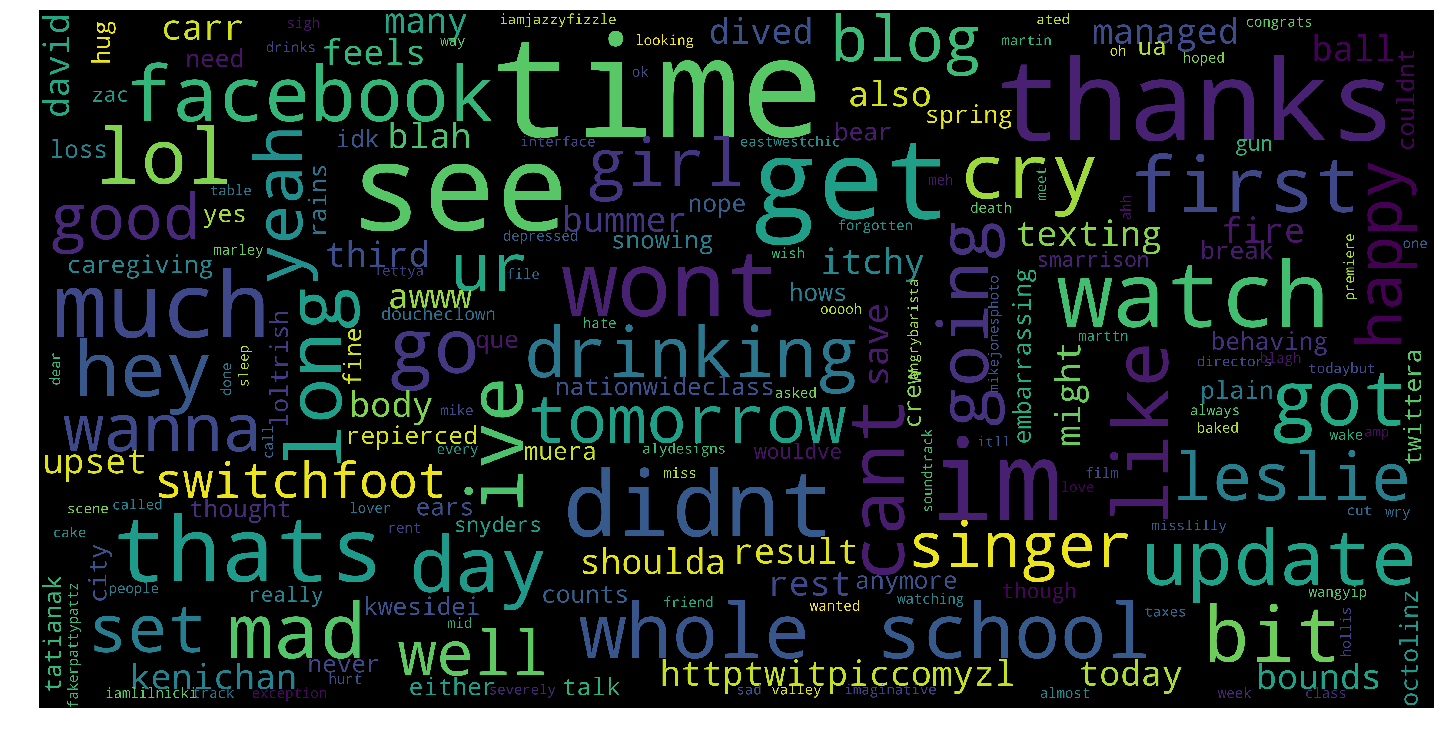

In [169]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stop,
        max_words=300,
        max_font_size=40, 
        collocations = False,
        scale=15,
        random_state=42 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(25, 25))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['text'])

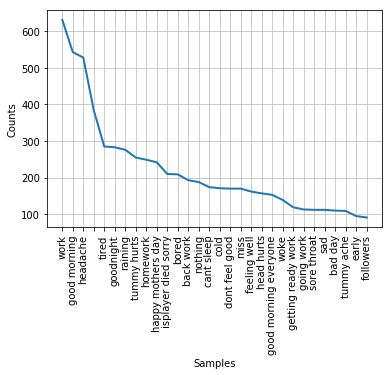

In [170]:
word_dist = nltk.FreqDist(df['text'])
word_dist.plot(30)

In [171]:
pd.set_option('display.max_colwidth', -1)
df.head(2)

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccomyzl awww thats bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry result school today also blah


In [172]:
df.drop(['id', 'date', 'query_string', 'user'], axis = 1, inplace= True)
label = pd.factorize(df['sentiment'].values)[0]

In [173]:
X_train, X_test, y_train, y_test = train_test_split(df['text'],label, train_size=.8,test_size=.2)

In [174]:
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(X_train)



In [175]:
cls = MultinomialNB()
cls.fit(x_train_tfidf , y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [176]:
X_test = vec.transform(X_test)
x_test_tfidf = tfidf_transformer.transform(X_test)


In [177]:
print(cls.predict(x_test_tfidf))
x_test_pred = cls.predict(x_test_tfidf)
x = x_test_pred.reshape(1, -1)
y = y_test.reshape(1, -1)
print(y.size)

[0 0 0 ..., 0 1 1]
320000


In [178]:
cls.score(x_test_tfidf,y_test)

0.76381874999999999

In [ ]:
import tweepy
import csv
import pandas as pd
####input your credentials here
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

consumer_key = 'RR6miKQ2GKE4cSKj889737iMr'
consumer_secret = 'FLLMME41CmVgCRGrydyoBFR3cmJWTpAmkndyjJI29NvkdYXlrE'
access_token = '2520042060-gTmuDa7yaKLWcJhJLq5igkwckTFBdqCBT9OopIh'
access_token_secret = 'tm6UVzoCPPO7L9Hiq9blymj0pVb5v0YMVEZdl2DLnaVLp'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
#####United Airlines
# Open/Create a file to append data
csvFile = open('TweetsAfter_27_03_2018.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q="#ManUtd",count=5000,
                           lang="en",
                           since="2017-04-03").items():
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'),tweet.retweets])

In [391]:
df_manutd = pd.read_csv('./TweetsTill_27_03_2018.csv', header = None, names = ['date_time', 'text'],encoding="ISO-8859-1")

In [392]:
df_manutd.head(10)

,date_time,text
0,2018-03-27 10:27:54,b'His best years are behind him. #mufc #manutd #mutv #ManchesterUnited https://t.co/hPWsGwXBbT'
1,2018-03-27 10:25:33,b'RT @ManUtdLatestCom: Jose Mourinho tells Ed Woodward Aaron Ramsey is BETTER than Paul Pogba ahead of summer\xc2\xa0move #mufc #ManUtd https://t.co\xe2\x80\xa6'
2,2018-03-27 10:24:36,"b'#39 Watch a @ManUtd game live\nTwo nights before Iceland, MBW scored last minute corporate tickets to a mid-week Eur\xe2\x80\xa6 https://t.co/o53OEUGlgz'"
3,2018-03-27 10:22:20,"b'Be careful when flaunting our achievements, Liverpool used to do this very same thing to #manutd. It only acted as\xe2\x80\xa6 https://t.co/6fPXC31SSS'"
4,2018-03-27 10:20:06,b'RT @EdwardStratmann: A piece on Eric Bailly for @EuroFantasyGame: https://t.co/TpBdkkiRwD #ManUtd #EPL'
5,2018-03-27 10:19:23,b'A piece on Eric Bailly for @EuroFantasyGame: https://t.co/TpBdkkiRwD #ManUtd #EPL'
6,2018-03-27 10:17:08,b'RT @paddyspower1: Bettingbestodds early bird #football #PremierLeague betting 31st March\n#ChampionsLeague\n\xc2\xa330 bonus is your 1st bet loses\n#\xe2\x80\xa6'
7,2018-03-27 10:16:37,b'RT @paddyspower1: Bettingbestodds early bird #football #PremierLeague betting 31st March\n#ChampionsLeague\n\xc2\xa330 bonus is your 1st bet loses\n#\xe2\x80\xa6'
8,2018-03-27 10:15:37,b'RT @paddyspower1: Bettingbestodds early bird #football #PremierLeague betting 31st March\n#ChampionsLeague\n\xc2\xa330 bonus is your 1st bet loses\n#\xe2\x80\xa6'
9,2018-03-27 10:15:07,b'RT @paddyspower1: Bettingbestodds early bird #football #PremierLeague betting 31st March\n#ChampionsLeague\n\xc2\xa330 bonus is your 1st bet loses\n#\xe2\x80\xa6'


In [393]:
df_manutd['Orig_text'] = df_manutd['text']
df_manutd.text = df_manutd.text.str.replace(r'\d+', '')
df_manutd.text = df_manutd['text'].str.replace('[{}]'.format(string.punctuation), '')
df_manutd['text'] = df_manutd['text'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop)]))
df_manutd['text'] = df_manutd['text'].astype(str)

In [394]:
df_manutd.text = df_manutd.text.str.replace(r'\d+', '')
df_manutd.text = df_manutd.text.str.replace('http\S+|www.\S+', '', case=False)
df_manutd.text = df_manutd.text.str.replace(r'xe', '', case=False)
df_manutd.text = df_manutd.text.str.replace(r'xf', '', case=False)
df_manutd.text = df_manutd.text.str.replace(r'xb', '', case=False)
df_manutd.text = df_manutd.text.str.replace(r'xa', '', case=False)
df_manutd.text = df_manutd.text.str.replace(r'//', '', case=False)
df_manutd.text = df_manutd.text.str.replace(r'\\', '', case=False)
df_manutd.text = df_manutd.text.str.replace(r'mx', '', case=False)
#m = re.sub(r':.*$', ":", str)
df_manutd.text = df_manutd.text.str.replace(r'brt', '', case=False)
df_manutd.text = df_manutd['text'].str.replace('[{}]'.format(string.punctuation), '')

#stop = set(stopwords.words('english'))
df_manutd['text'] = df_manutd['text'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop)]))

#ttnz = TweetTokenizer()

#f_manutd['tokenized_tweets'] = df_manutd['text'].apply(ttnz.tokenize)

#n_gram = df_manutd['text'].apply(ngrams(nltk.word_tokenize,n))


In [395]:
df_manutd.head()

,date_time,text,Orig_text
0,2018-03-27 10:27:54,bhis best years behind mufc manutd mutv manchesterunited,b'His best years are behind him. #mufc #manutd #mutv #ManchesterUnited https://t.co/hPWsGwXBbT'
1,2018-03-27 10:25:33,manutdlatestcom jose mourinho tells ed woodward aaron ramsey better paul pogba ahead summerxcmove mufc manutd,b'RT @ManUtdLatestCom: Jose Mourinho tells Ed Woodward Aaron Ramsey is BETTER than Paul Pogba ahead of summer\xc2\xa0move #mufc #ManUtd https://t.co\xe2\x80\xa6'
2,2018-03-27 10:24:36,b watch manutd game liventwo nights iceland mbw scored last minute corporate tickets midweek eurx,"b'#39 Watch a @ManUtd game live\nTwo nights before Iceland, MBW scored last minute corporate tickets to a mid-week Eur\xe2\x80\xa6 https://t.co/o53OEUGlgz'"
3,2018-03-27 10:22:20,bbe careful flaunting achievements liverpool used thing manutd acted asx,"b'Be careful when flaunting our achievements, Liverpool used to do this very same thing to #manutd. It only acted as\xe2\x80\xa6 https://t.co/6fPXC31SSS'"
4,2018-03-27 10:20:06,edwardstratmann piece eric bailly eurofantasygame manutd epl,b'RT @EdwardStratmann: A piece on Eric Bailly for @EuroFantasyGame: https://t.co/TpBdkkiRwD #ManUtd #EPL'


In [396]:
ttnz = TweetTokenizer()

df_manutd['tokenized_tweets'] = df_manutd['text'].apply(ttnz.tokenize)

stemmer = SnowballStemmer(language= 'english', ignore_stopwords= True)
df_manutd['tokenized_tweets'] = df_manutd['tokenized_tweets'].apply(lambda x: [stemmer.stem(y) for y in x])

pd.set_option('display.max_colwidth', -1)
df.head(10)

lemmatizer = WordNetLemmatizer()
df_manutd['tokenized_tweets'] = df_manutd['tokenized_tweets'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

All frequencies, including STOPWORDS:


Text(0,0.5,'Frequency')

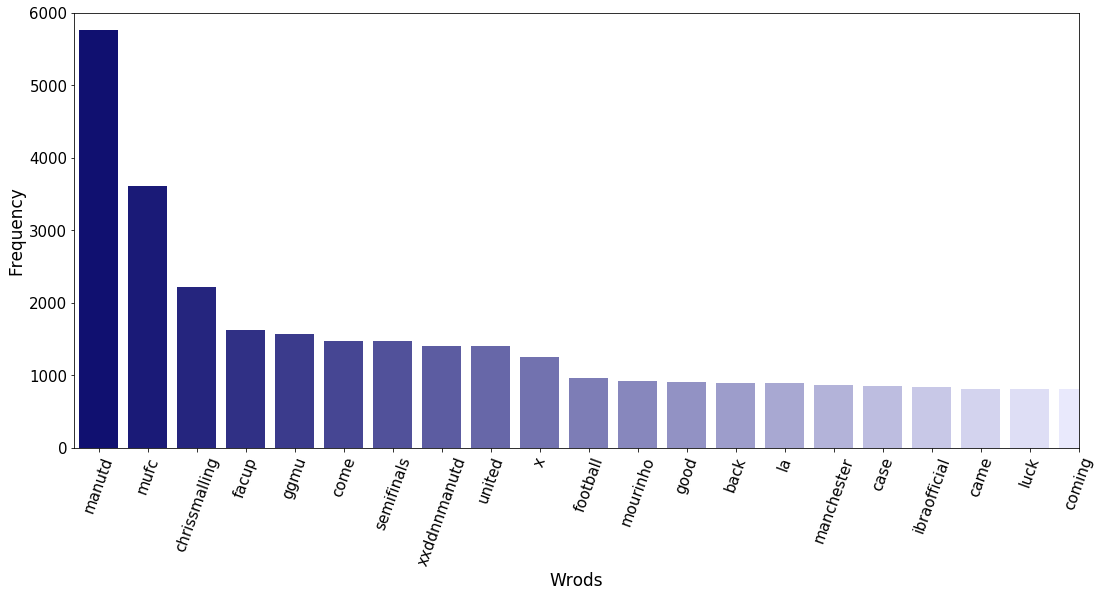

In [398]:
txt = df_manutd.text.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
top_N = 30
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word').reset_index()

fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(x='Word',y='Frequency',data=rslt,palette=sns.light_palette("navy",reverse=True,n_colors=21))
plt.xticks(rotation=70)
plt.xticks(size=15)
plt.yticks(size=15)
ax.set(ylim=(0,6000))
ax.set(xlim=(None,20))
ax.set_xlabel('Wrods',size=17)
ax.set_ylabel('Frequency',size=17)

In [399]:
rslt.head(10)

,Word,Frequency
0,manutd,5768
1,mufc,3609
2,chrissmalling,2220
3,facup,1632
4,ggmu,1565
5,come,1475
6,semifinals,1473
7,xxddnnmanutd,1410
8,united,1406
9,x,1247


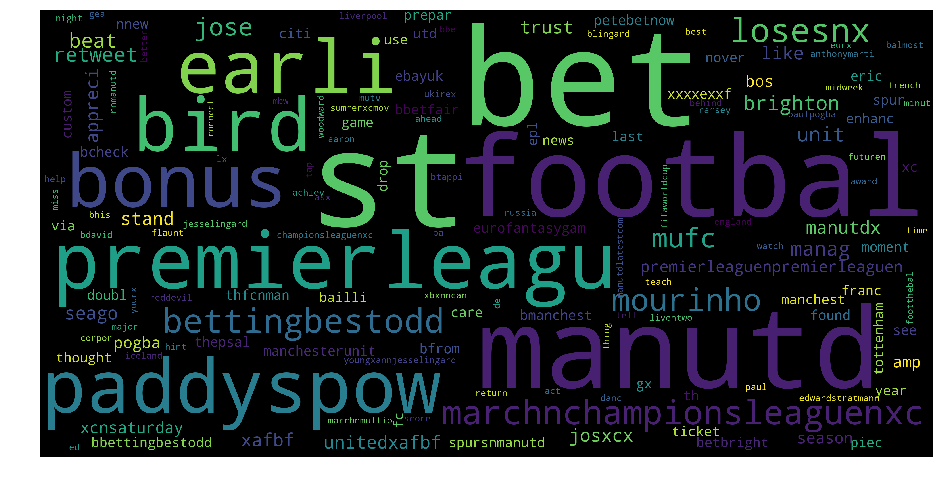

In [400]:
from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stop,
        max_words=150,
        max_font_size=60, 
        collocations = False,
        scale=10,
        random_state=42 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_manutd['tokenized_tweets'])
#show_wordcloud(Samsung_Reviews_positive['Reviews'])

In [418]:
df_manutd_text = vec.transform(df_manutd.text)
df_manutd_text_tfidf = tfidf_transformer.fit_transform(df_manutd_text)
df_pred = cls.predict_proba(df_manutd_text_tfidf)
df_pred_bin = cls.predict(df_manutd_text_tfidf)


In [419]:
df_pred = pd.DataFrame(df_pred)
df_pred_bin = pd.DataFrame(df_pred_bin)
df_pred_bin = df_pred_bin.reset_index()
df_pred.columns = [['prediction_p', 'prediction_n']]
df_pred = df_pred.reset_index()
df_pred_bin['isPos'] = df_pred_bin[0]

In [420]:
df_manutd_merge = df_manutd.reset_index()

In [421]:
df_pred = df_pred_bin.merge(df_pred)

In [422]:
df_pred = df_pred.merge(df_manutd_merge)

In [423]:
df_pred.head()

,index,0,isPos,prediction_p,prediction_n,date_time,text,Orig_text,tokenized_tweets
0,0,0,0,0.518582,0.481418,2018-03-27 10:27:54,bhis best years behind mufc manutd mutv manchesterunited,b'His best years are behind him. #mufc #manutd #mutv #ManchesterUnited https://t.co/hPWsGwXBbT',"[bhis, best, year, behind, mufc, manutd, mutv, manchesterunit]"
1,1,0,0,0.541030,0.458970,2018-03-27 10:25:33,manutdlatestcom jose mourinho tells ed woodward aaron ramsey better paul pogba ahead summerxcmove mufc manutd,b'RT @ManUtdLatestCom: Jose Mourinho tells Ed Woodward Aaron Ramsey is BETTER than Paul Pogba ahead of summer\xc2\xa0move #mufc #ManUtd https://t.co\xe2\x80\xa6',"[manutdlatestcom, jose, mourinho, tell, ed, woodward, aaron, ramsey, better, paul, pogba, ahead, summerxcmov, mufc, manutd]"
2,2,0,0,0.518051,0.481949,2018-03-27 10:24:36,b watch manutd game liventwo nights iceland mbw scored last minute corporate tickets midweek eurx,"b'#39 Watch a @ManUtd game live\nTwo nights before Iceland, MBW scored last minute corporate tickets to a mid-week Eur\xe2\x80\xa6 https://t.co/o53OEUGlgz'","[b, watch, manutd, game, liventwo, night, iceland, mbw, score, last, minut, corpor, ticket, midweek, eurx]"
3,3,0,0,0.653718,0.346282,2018-03-27 10:22:20,bbe careful flaunting achievements liverpool used thing manutd acted asx,"b'Be careful when flaunting our achievements, Liverpool used to do this very same thing to #manutd. It only acted as\xe2\x80\xa6 https://t.co/6fPXC31SSS'","[bbe, care, flaunt, achiev, liverpool, use, thing, manutd, act, asx]"
4,4,1,1,0.461768,0.538232,2018-03-27 10:20:06,edwardstratmann piece eric bailly eurofantasygame manutd epl,b'RT @EdwardStratmann: A piece on Eric Bailly for @EuroFantasyGame: https://t.co/TpBdkkiRwD #ManUtd #EPL',"[edwardstratmann, piec, eric, bailli, eurofantasygam, manutd, epl]"


In [424]:
df_pred.drop([0],axis=1,inplace=True)

In [425]:
#df_pred = df_pred.join(df_manutd)

In [426]:
df_pred = df_pred.drop(['text', 'tokenized_tweets'],axis=1)

In [427]:
df_pred.head()

,index,isPos,prediction_p,prediction_n,date_time,Orig_text
0,0,0,0.518582,0.481418,2018-03-27 10:27:54,b'His best years are behind him. #mufc #manutd #mutv #ManchesterUnited https://t.co/hPWsGwXBbT'
1,1,0,0.541030,0.458970,2018-03-27 10:25:33,b'RT @ManUtdLatestCom: Jose Mourinho tells Ed Woodward Aaron Ramsey is BETTER than Paul Pogba ahead of summer\xc2\xa0move #mufc #ManUtd https://t.co\xe2\x80\xa6'
2,2,0,0.518051,0.481949,2018-03-27 10:24:36,"b'#39 Watch a @ManUtd game live\nTwo nights before Iceland, MBW scored last minute corporate tickets to a mid-week Eur\xe2\x80\xa6 https://t.co/o53OEUGlgz'"
3,3,0,0.653718,0.346282,2018-03-27 10:22:20,"b'Be careful when flaunting our achievements, Liverpool used to do this very same thing to #manutd. It only acted as\xe2\x80\xa6 https://t.co/6fPXC31SSS'"
4,4,1,0.461768,0.538232,2018-03-27 10:20:06,b'RT @EdwardStratmann: A piece on Eric Bailly for @EuroFantasyGame: https://t.co/TpBdkkiRwD #ManUtd #EPL'


In [429]:
df_pred.date_time = pd.to_datetime(df_pred.date_time)
df_pred.date_time = df_pred.date_time.dt.date
df_pred = df_pred.groupby('date_time').mean().reset_index()

In [430]:
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

params = [
    # Dow Jones
    {
        'q': "MANU",
        'x': "NYSE",
    },
]
period = "1M"
interval = 60*60*24 # 30 minutes
# get open, high, low, close, volume time data (return pandas dataframe)
df_stock = get_prices_time_data(params, period, interval)

In [431]:
df_stock.index.names = ['date_time']
df_stock.reset_index(inplace=True)

In [432]:
df_stock.tail()

,date_time,MANU_Open,MANU_High,MANU_Low,MANU_Close,MANU_Volume
15,2018-03-20 21:00:00,20.00,20.425,19.70,19.75,30313
16,2018-03-21 21:00:00,19.75,19.750,19.30,19.45,34713
17,2018-03-22 21:00:00,19.50,19.550,19.30,19.50,20185
18,2018-03-23 21:00:00,19.55,19.600,19.05,19.10,17259
19,2018-03-26 22:00:00,19.40,19.400,18.70,18.85,29867


In [433]:
import datetime
date = datetime.date(2018, 3, 15)
df_stock = df_stock[df_stock['date_time'] > date]
df_stock.date_time = pd.to_datetime(df_stock.date_time)
df_stock.date_time = df_stock.date_time.dt.date

In [434]:
df = df_stock.merge(df_pred)

In [435]:
df.head()

,date_time,MANU_Open,MANU_High,MANU_Low,MANU_Close,MANU_Volume,index,isPos,prediction_p,prediction_n
0,2018-03-19,19.75,20.000,19.40,19.85,37596,5505.5,0.469734,0.518894,0.481106
1,2018-03-20,20.00,20.425,19.70,19.75,30313,4718.0,0.512684,0.494135,0.505865
2,2018-03-21,19.75,19.750,19.30,19.45,34713,3984.0,0.634214,0.465373,0.534627
3,2018-03-22,19.50,19.550,19.30,19.50,20185,3222.5,0.498756,0.502174,0.497826
4,2018-03-23,19.55,19.600,19.05,19.10,17259,2523.0,0.542857,0.489544,0.510456


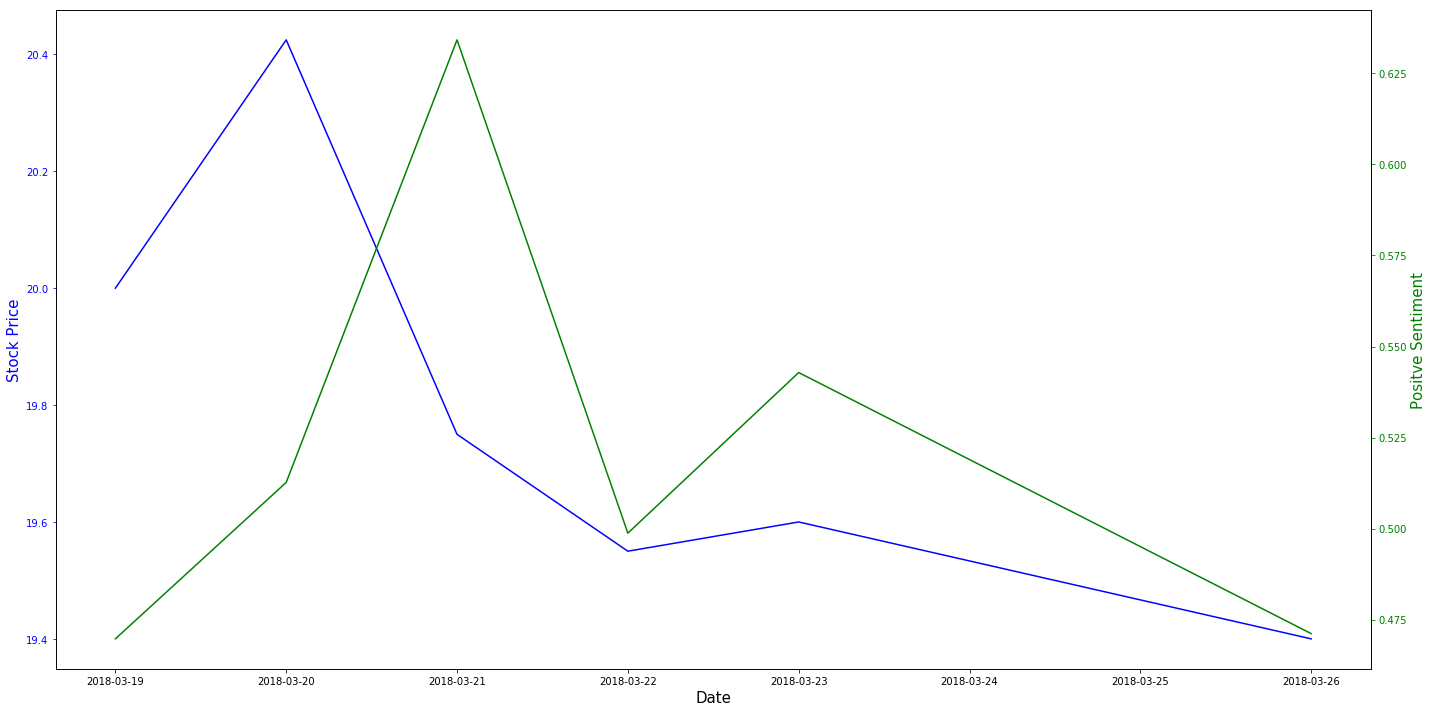

In [436]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(20,10))
t = df['date_time']
s1 = df['MANU_High']
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('Date', size = 15)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Stock Price', color='b', size =15)
ax1.tick_params('y', colors='b')

# ax2 = ax1.twinx()
# s2 = df['prediction_p']
# ax2.plot(t, s2, 'r-')
# ax2.set_ylabel('Positve Sentiment', color='r' , size = 15)
# ax2.tick_params('y', colors='r')

ax2 = ax1.twinx()
s2 = df['isPos']
ax2.plot(t, s2, 'g-')
ax2.set_ylabel('Positve Sentiment', color='g' , size = 15)
ax2.tick_params('y', colors='g')

fig.tight_layout()
plt.show()